# Central Limit Theorem - Lab

## Introduction

In this lab, we'll learn how to use the Central Limit Theorem to work with non-normally distributed datasets as if they were normally distributed.  

## Objectives

You will be able to:

* Use built-in methods to detect non-normal datasets
* Create a sampling distribution of sample means to demonstrate the central limit theorem

## Let's get started!

First, import the required libraries:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import scipy.stats as st
np.random.seed(0) #set a random seed for reproducibility

Next, read in the dataset.  A dataset of 10,000 numbers is stored in `non_normal_dataset.csv`. Use pandas to read the data into a series.

**_Hint:_** Any of the `read_` methods in pandas will store 1-dimensional in a Series instead of a DataFrame if passed the optimal parameter `squeeze=True`.

In [4]:
# Your code here
df = pd.read_csv('non_normal_dataset.csv')
data_series = df.squeeze()

## Detecting Non-Normal Datasets

Before we can make use of the normal distribution, we need to first confirm that our data is normally distributed.  If it is not, then we'll need to use the Central Limit Theorem to create a sampling distribution of sample means that will be normally distributed.  

There are two main ways to check if a sample follows the normal distribution or not.  The easiest is to simply plot the data and visually check if the data follows a normal curve or not.  

In the cell below, use `seaborn`'s `distplot` method to visualize a histogram of the distribution overlaid with the probability density curve.  

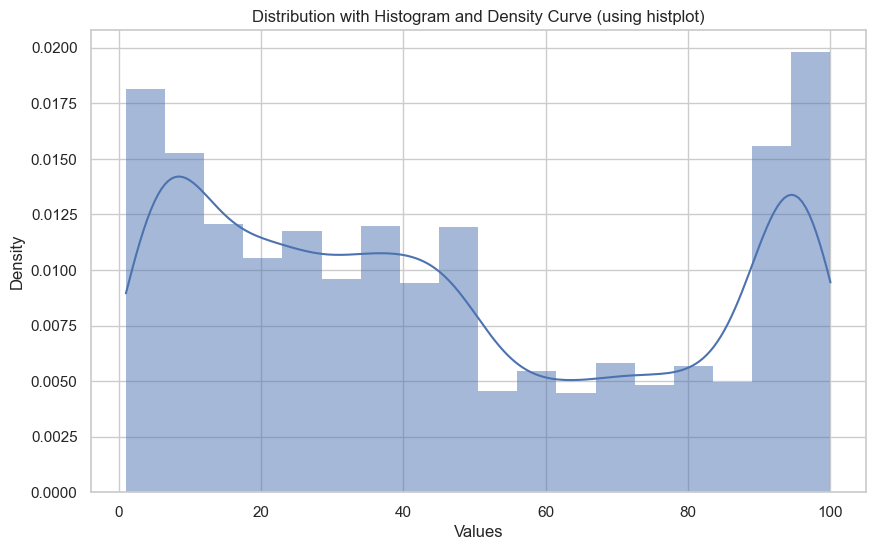

In [7]:
# Your code here
# Set up the plot style
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))

# Method 1: Using histplot (recommended for current seaborn versions)
# This creates a histogram with KDE overlay
sns.histplot(data=data_series, kde=True, stat="density", linewidth=0)
plt.title('Distribution with Histogram and Density Curve (using histplot)')
plt.xlabel('Values')
plt.ylabel('Density')
plt.show()

C:\Users\USER\AppData\Local\Temp\ipykernel_10752\414713609.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_series, kde=True, hist=True, norm_hist=True)


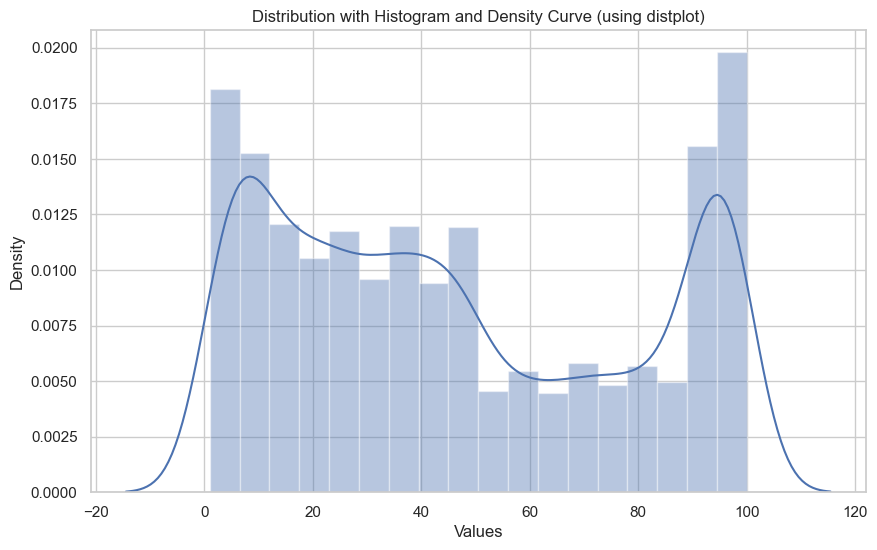

In [10]:
# Method 2: Alternative using the older distplot (if you have an older seaborn version)
# Note: distplot is deprecated but may still work
plt.figure(figsize=(10, 6))
try:
    sns.distplot(data_series, kde=True, hist=True, norm_hist=True)
    plt.title('Distribution with Histogram and Density Curve (using distplot)')
    plt.xlabel('Values')
    plt.ylabel('Density')
    plt.show()
except Exception as e:
    print(f"distplot failed (likely deprecated): {e}")

As expected, this dataset is not normally distributed.  

For a more formal way to check if a dataset is normally distributed or not, we can make use of a statistical test.  There are many different statistical tests that can be used to check for normality, but we'll keep it simple and just make use of the `normaltest()` function from `scipy.stats`, which we imported as `st` --see the [documentation](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.normaltest.html) if you have questions about how to use this method. 

In the cell below, use `normaltest()` to check if the dataset is normally distributed.  

In [11]:
# Your code here
from scipy import stats as st

# Perform normality test
statistic, p_value = st.normaltest(data_series)

print("Normality Test Results:")
print(f"Test Statistic: {statistic:.4f}")
print(f"P-value: {p_value:.4e}")

# Interpret the results
alpha = 0.05  # Significance level
print(f"\nSignificance level: {alpha}")

if p_value < alpha:
    print("Result: Reject the null hypothesis")
    print("Conclusion: The data is NOT normally distributed")
else:
    print("Result: Fail to reject the null hypothesis")
    print("Conclusion: The data is normally distributed")

Normality Test Results:
Test Statistic: 43432.8111
P-value: 0.0000e+00

Significance level: 0.05
Result: Reject the null hypothesis
Conclusion: The data is NOT normally distributed


The output may seem a bit hard to interpret since we haven't covered hypothesis testing and p-values in further detail yet.  However, the function tests the hypothesis that the distribution passed into the function differs from the normal distribution. The null hypothesis would then be that the data *is* normally distributed. We typically reject the null hypothesis if the p-value is less than 0.05. For now, that's all you need to remember--this will make more sense once you work with p-values more which you'll do subsequently.  

Since our dataset is non-normal, that means we'll need to use the **_Central Limit Theorem._**

## Sampling With Replacement

In order to create a Sampling Distribution of Sample Means, we need to first write a function that can sample *with* replacement.  

In the cell below, write a function that takes in an array of numbers `data` and a sample size `n` and returns an array that is a random sample of `data`, of size `n`. Additionally, we've added a marker for random seed for reproducability. 

In [17]:
def get_sample(data, n, seed):
    #Adding random seed for reproducibility
    np.random.seed(seed)
    
    #Your code here
    sample = np.random.choice(data, size=n, replace=True)
    
    return sample

test_sample = get_sample(data_series, 30, 0)
print(test_sample[:5]) 
# [56, 12, 73, 24, 8] (This will change if you run it multiple times)

[56 12 73 24  8]


## Generating a Sample Mean

Next, we'll write another helper function that takes in a sample and returns the mean of that sample.  

In [16]:
def get_sample_mean(sample):
    
    # Your code here
    # Calculate and return the mean of the sample
    sample_mean = np.mean(sample)
    
    return sample_mean

test_sample2 = get_sample(data_series, 30, 0)
test_sample2_mean = get_sample_mean(test_sample2)
print(test_sample2_mean) 
# 32.733333333333334

32.733333333333334


### Creating a Sampling Distribution of Sample Means

Now that we have helper functions to help us sample with replacement and calculate sample means, we just need to bring it all together and write a function that creates a sampling distribution of sample means!

In the cell below, write a function that takes in 3 arguments: the dataset, the size of the distribution to create, and the size of each individual sample. The function should return a sampling distribution of sample means of the given size.  

Make sure to include some way to change the seed as your function proceeds!

In [19]:
def create_sample_distribution(data, dist_size=100, n=30, initial_seed=0):
    """
    Creates a sampling distribution of sample means.
    
    Parameters:
    data (array-like): The dataset to sample from
    dist_size (int): Number of sample means in the distribution
    sample_size (int): Size of each individual sample or n in this case
    initial_seed (int): Starting seed for reproducibility
    
    Returns:
    numpy array: Array of sample means
    """
    sample_means = []
    for i in range(dist_size):
        # Use a different seed for each sample to ensure variety
        current_seed = initial_seed + i
        sample = get_sample(data, n, current_seed)
        sample_mean = get_sample_mean(sample)
        sample_means.append(sample_mean)
    
    return np.array(sample_means)

test_sample_dist = create_sample_distribution(data_series)
print(test_sample_dist[:5]) 

# If you set your seed to start at zero and iterate by 1 each sample you should get:
# [32.733333333333334, 54.266666666666666, 50.7, 36.53333333333333, 40.0]

[32.73333333 54.26666667 50.7        36.53333333 40.        ]


## Visualizing the Sampling Distribution as it Becomes Normal

The sampling distribution of sample means isn't guaranteed to be normal after it hits a magic size.  Instead, the distribution begins to approximate a normal distribution as it gets larger and larger.  Generally, 30 is accepted as the sample size where the Central Limit Theorem begins to kick in--however, there are no magic numbers when it comes to probability. On average, and only on average, a sampling distribution of sample means where the individual sample sizes were 29 would only be slightly less normal, while one with sample sizes of 31 would likely only be slightly more normal.  

Let's create some sampling distributions of different sizes and watch the Central Limit Theorem kick in. As the sample size increases, you'll see the distributions begin to approximate a normal distribution more closely.  

In the cell below, create a sampling distribution from `data` of `dist_size` 10, with a sample size `n` of 3. Then, visualize this sampling distribution with `displot`.

Sampling distribution with n=3: [47.         79.66666667 37.66666667 79.66666667 49.66666667 88.66666667
 45.33333333 33.         37.66666667 60.66666667]
Mean: 55.9000
Standard Deviation: 19.0922


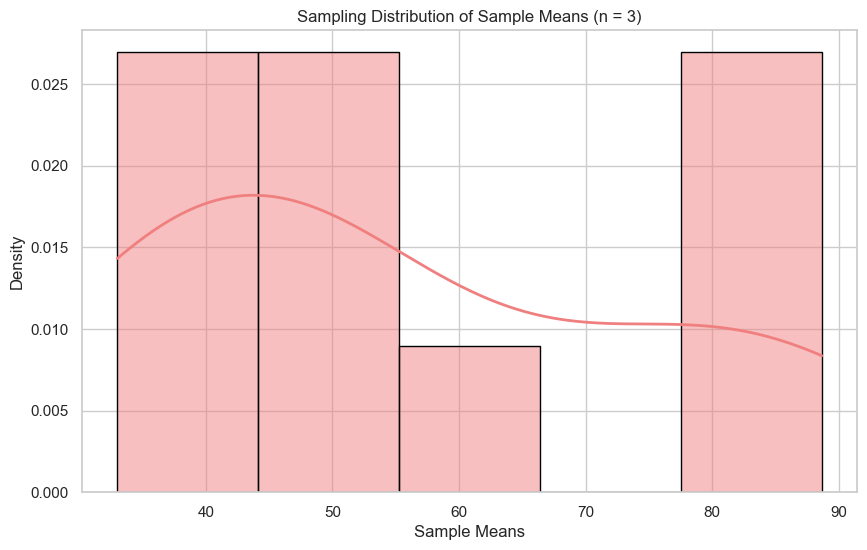

In [22]:
# Your code here
# Create sampling distribution with small sample size
sampling_dist_small = create_sample_distribution(data_series, dist_size=10, n=3, initial_seed=0)

print(f"Sampling distribution with n=3: {sampling_dist_small}")
print(f"Mean: {sampling_dist_small.mean():.4f}")
print(f"Standard Deviation: {sampling_dist_small.std():.4f}")

# Visualize the sampling distribution
plt.figure(figsize=(10, 6))
sns.histplot(sampling_dist_small, kde=True, stat="density", 
             color='lightcoral', edgecolor='black', 
             line_kws={'linewidth': 2, 'color': 'darkred'})
plt.title('Sampling Distribution of Sample Means (n = 3)')
plt.xlabel('Sample Means')
plt.ylabel('Density')
plt.show()

Now, let's increase the `dist_size` to 30, and `n` to 10.  Create another visualization to compare how it changes as size increases.  

Sampling distribution with n=3: [36.9 50.1 61.7 41.  49.7 60.  48.9 30.1 40.8 48.5 35.3 50.3 50.  49.7
 53.9 35.1 42.6 33.4 41.6 59.2 45.9 61.4 46.3 67.8 44.1 42.4 39.2 53.5
 62.9 41.9]
Mean: 47.4733
Standard Deviation: 9.4021


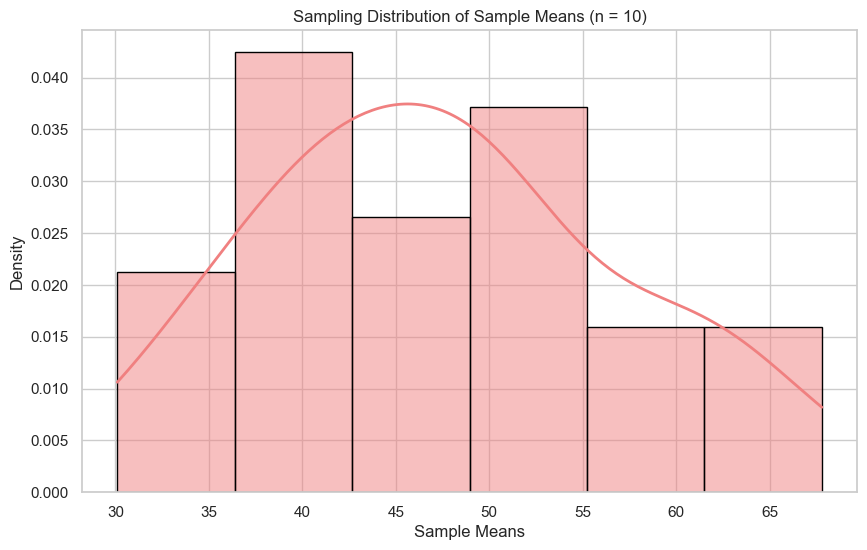

In [24]:
# Your code here
# Your code here
# Create sampling distribution with small sample size
sampling_dist_small = create_sample_distribution(data_series, dist_size=30, n=10, initial_seed=0)

print(f"Sampling distribution with n=3: {sampling_dist_small}")
print(f"Mean: {sampling_dist_small.mean():.4f}")
print(f"Standard Deviation: {sampling_dist_small.std():.4f}")

# Visualize the sampling distribution
plt.figure(figsize=(10, 6))
sns.histplot(sampling_dist_small, kde=True, stat="density", 
             color='lightcoral', edgecolor='black', 
             line_kws={'linewidth': 2, 'color': 'darkred'})
plt.title('Sampling Distribution of Sample Means (n = 10)')
plt.xlabel('Sample Means')
plt.ylabel('Density')
plt.show()

The data is already looking much more 'normal' than the first sampling distribution, and much more 'normal' that the raw non-normal distribution we're sampling from. 

In the cell below, create another sampling distribution of `data` with `dist_size` 1000 and `n` of 30.  Visualize it to confirm the normality of this new distribution. 

Sampling distribution with n=3: [32.73333333 54.26666667 50.7        36.53333333 40.         48.03333333
 50.56666667 39.46666667 41.9        40.13333333 49.83333333 45.9
 50.6        44.7        49.23333333 41.8        32.36666667 49.53333333
 43.         47.53333333 46.76666667 46.63333333 44.         50.26666667
 49.76666667 44.3        36.23333333 52.3        51.         41.23333333
 37.76666667 53.8        47.06666667 53.33333333 40.86666667 55.43333333
 42.5        60.23333333 39.26666667 45.26666667 43.33333333 39.76666667
 44.         54.43333333 41.2        47.8        38.16666667 48.73333333
 44.03333333 44.26666667 41.56666667 45.13333333 44.8        46.6
 41.03333333 50.43333333 41.6        36.1        44.66666667 48.16666667
 34.2        53.56666667 48.26666667 43.4        56.2        47.66666667
 39.9        44.86666667 40.26666667 55.23333333 42.         53.93333333
 41.9        50.73333333 49.03333333 48.63333333 47.53333333 37.93333333
 44.33333333 52.8        54.06666

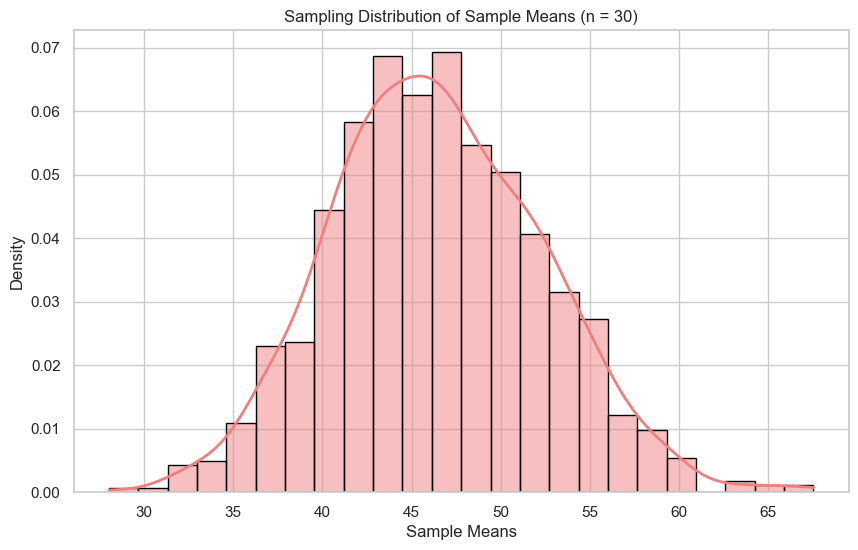

In [25]:
# Your code here
# Your code here
# Create sampling distribution with small sample size
sampling_dist_small = create_sample_distribution(data_series, dist_size=1000, n=30, initial_seed=0)

print(f"Sampling distribution with n=3: {sampling_dist_small}")
print(f"Mean: {sampling_dist_small.mean():.4f}")
print(f"Standard Deviation: {sampling_dist_small.std():.4f}")

# Visualize the sampling distribution
plt.figure(figsize=(10, 6))
sns.histplot(sampling_dist_small, kde=True, stat="density", 
             color='lightcoral', edgecolor='black', 
             line_kws={'linewidth': 2, 'color': 'darkred'})
plt.title('Sampling Distribution of Sample Means (n = 30)')
plt.xlabel('Sample Means')
plt.ylabel('Density')
plt.show()

Great! As you can see, the dataset _approximates_ a normal distribution. It isn't pretty, but it's generally normal enough that we can use it to answer statistical questions using $z$-scores and p-values.  

Another handy feature of the Central Limit Theorem is that the mean and standard deviation of the sampling distribution should also approximate the population mean and standard deviation from the original non-normal dataset!  Although it's outside the scope of this lab, we could also use the same sampling methods seen here to approximate other parameters from any non-normal distribution, such as the median or mode!

## Summary

In this lab, we learned to apply the central limit theorem in practice. We learned how to determine if a dataset is normally distributed or not. From there, we used a function to sample with replacement and generate sample means. Afterwards, we created a normal distribution of sample means in order to answer questions about non-normally distributed datasets.  